In [1]:
%load_ext autoreload
%autoreload 2

In [192]:
import pandas as pd
import numpy as np

from umap import UMAP
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Simple Util to draw plots

In [243]:
def make_plot(title, embeds, group, labels=['LBird on L', 'LBird on W', 'WBird on L', 'WBird on W'], 
              xlabel='UMAP Component 1',
              ylabel='UMAP Component 2', 
              size=0.3):
    fig, ax = plt.subplots()
    component_0 = embeds[:,0]
    component_1 = embeds[:,1]
    group = group
    size = size
    title = title
    labels = labels
    # legend = {0:'C0', 1:'C1'}

    for g in np.unique(group):

      idx = np.where(group == g)
      ax.scatter(component_0[idx], component_1[idx], label=labels[g], s=size,)  # c = legend[g],

    plt.rc('font', size=14) 
    ax.legend(fontsize=10)

    plt.title(title)


    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    fig = plt.gcf()
    plt.savefig(f'{title}.png')
    plt.show()

#Feature visualize

## Feature superclass

In [244]:
df_features_sup = pd.read_csv('./features_super.csv', index_col=0)

In [245]:
features_sup = df_features_sup.drop(['label'], axis=1).values

In [246]:
reducer = UMAP(random_state=8, n_components=2)
embeds_sup = reducer.fit_transform(features_sup)


In [247]:
groups_sup =  df_features_sup['label'].values

In [248]:
groups_b_sup = np.where(groups_sup > 1, 1,0)

In [249]:
silhouette_avg = silhouette_score(embeds_sup, groups_sup)
silhouette_avg

0.13741851

In [250]:
silhouette_avg = silhouette_score(embeds_sup, groups_b_sup)
silhouette_avg

0.096117534

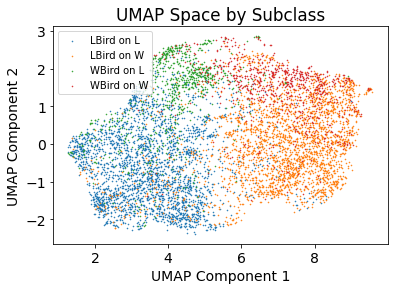

In [253]:
make_plot('UMAP Space by Subclass', embeds_sup, groups_sup)

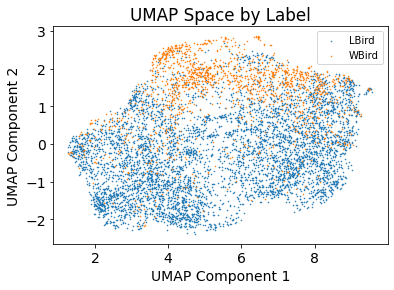

In [254]:
make_plot('UMAP Space by Label', embeds_sup, groups_b_sup,  labels=['LBird', 'WBird'])

## Feature Subclass

In [148]:
df_features_sub = pd.read_csv('./features_sub.csv', index_col=0)
features_sub = df_features_sub.drop(['label'], axis=1).values
reducer = UMAP(random_state=8, n_components=2)
embeds_sub = reducer.fit_transform(features_sub)

In [149]:
groups_sub =  df_features_sub['label'].values
groups_b_sub = np.where(groups_sub > 1, 1,0)

In [80]:
silhouette_avg = silhouette_score(embeds_sub, groups_sub)

In [81]:
silhouette_avg

0.14383115

In [154]:
silhouette_avg = silhouette_score(embeds_sub, groups_b_sub)
silhouette_avg

0.10216622

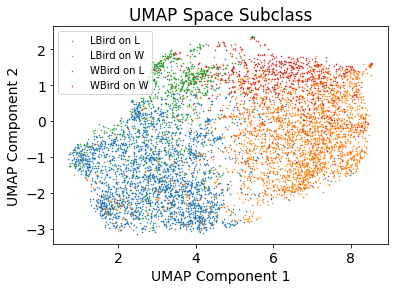

In [97]:
make_plot('UMAP Space Subclass', embeds_sub, groups_sub)

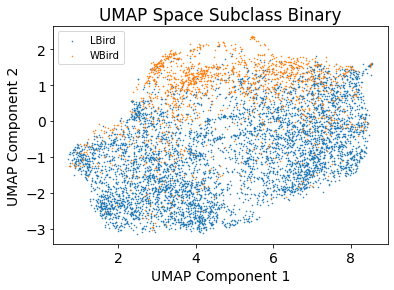

In [150]:
make_plot('UMAP Space Subclass Binary', embeds_sub, groups_b_sub,  labels=['LBird', 'WBird'])

## Feature superclass balanced

In [122]:
df_features_supr = pd.read_csv('./features_super_r.csv', index_col=0)
features_supr = df_features_supr.drop(['label'], axis=1).values
reducer = UMAP(random_state=8, n_components=2)
embeds_supr = reducer.fit_transform(features_supr)

In [151]:
groups_supr =  df_features_supr['label'].values
groups_b_supr = np.where(groups_supr > 1, 1,0)

In [124]:
silhouette_avg = silhouette_score(embeds_supr, groups_supr)
silhouette_avg

0.15885371

In [153]:
silhouette_avg = silhouette_score(embeds_supr, groups_b_supr)
silhouette_avg

0.15585531

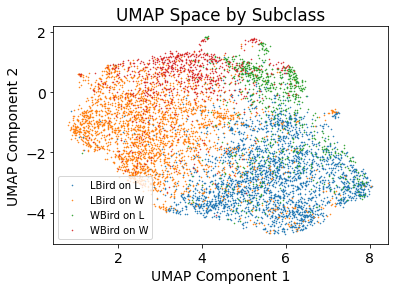

In [255]:
make_plot('UMAP Space by Subclass', embeds_supr, groups_supr)

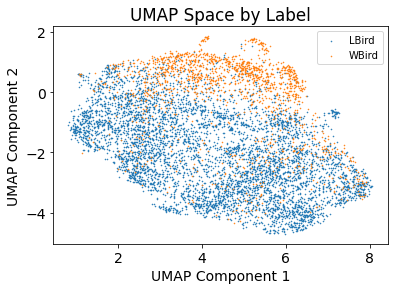

In [256]:
make_plot('UMAP Space by Label', embeds_supr, groups_b_supr,  labels=['LBird', 'WBird'])

## Feature Subclass balanced

In [98]:
df_features_subr = pd.read_csv('./features_sub_r.csv', index_col=0)
features_subr = df_features_subr.drop(['label'], axis=1).values
reducer = UMAP(random_state=8, n_components=2)
embeds_subr = reducer.fit_transform(features_subr)

In [157]:
groups_subr =  df_features_subr['label'].values
groups_b_subr = np.where(groups_subr > 1, 1,0)

In [102]:
silhouette_avg = silhouette_score(embeds_subr, groups_subr)
silhouette_avg

0.16065896

In [158]:
silhouette_avg = silhouette_score(embeds_subr, groups_b_subr)
silhouette_avg

0.15165716

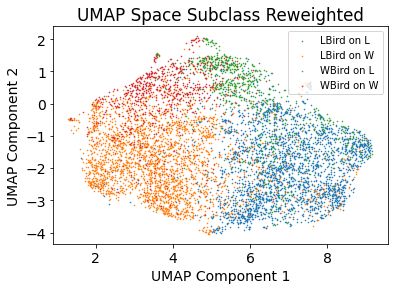

In [101]:
make_plot('UMAP Space Subclass Reweighted', embeds_subr, groups_subr)

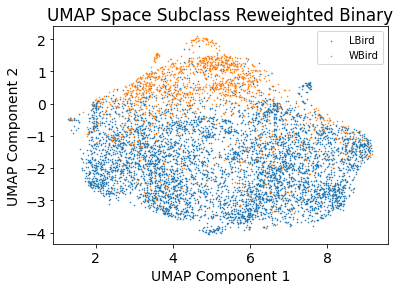

In [159]:
make_plot('UMAP Space Subclass Reweighted Binary', embeds_subr, groups_b_subr,  labels=['LBird', 'WBird'])

## Feature Superclass gdro

In [133]:
df_features_supg = pd.read_csv('./features_super_r_g.csv', index_col=0)
features_supg = df_features_supg.drop(['label'], axis=1).values
reducer = UMAP(random_state=8, n_components=2)
embeds_supg = reducer.fit_transform(features_supg)

In [161]:
groups_supg =  df_features_supg['label'].values
groups_b_supg = np.where(groups_supg > 1, 1,0)

In [135]:
silhouette_avg = silhouette_score(embeds_supg, groups_supg)
silhouette_avg

0.15716246

In [162]:
silhouette_avg = silhouette_score(embeds_supg, groups_b_supg)
silhouette_avg

0.1538979

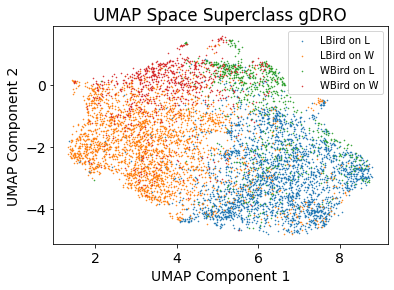

In [136]:
make_plot('UMAP Space Superclass gDRO', embeds_supg, groups_supg)

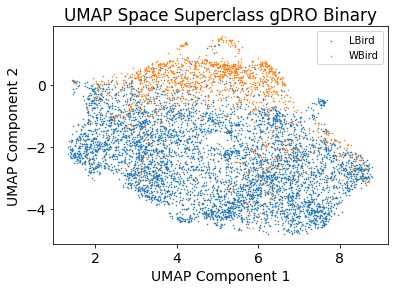

In [163]:
make_plot('UMAP Space Superclass gDRO Binary', embeds_supg, groups_b_supg,  labels=['LBird', 'WBird'])

## Feature Subclass gdro

In [129]:
df_features_subg = pd.read_csv('./features_sub_r_g.csv', index_col=0)
features_subg = df_features_subg.drop(['label'], axis=1).values
reducer = UMAP(random_state=8, n_components=2)
embeds_subg = reducer.fit_transform(features_subg)

In [164]:
groups_subg =  df_features_subg['label'].values
groups_b_subg = np.where(groups_subg > 1, 1,0)

In [131]:
silhouette_avg = silhouette_score(embeds_subg, groups_subg)
silhouette_avg

0.16288789

In [165]:
silhouette_avg = silhouette_score(embeds_subg, groups_b_subg)
silhouette_avg

0.15480492

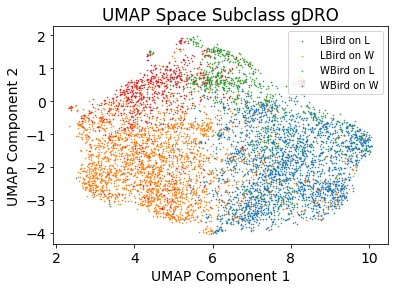

In [132]:
make_plot('UMAP Space Subclass gDRO', embeds_subg, groups_subg)

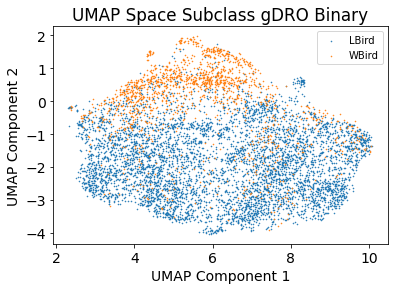

In [166]:
make_plot('UMAP Space Subclass gDRO Binary', embeds_subg, groups_b_subg,  labels=['LBird', 'WBird'])

## Feature Base

In [215]:
df_features_base = pd.read_csv('./features_base.csv', index_col=0)
features_base = df_features_base.drop(['label', 'pred_labels'], axis=1).values
reducer = UMAP(random_state=8, n_components=2)
embeds_base = reducer.fit_transform(features_base)

In [216]:
groups_base =  df_features_base['label'].values
groups_b_base = np.where(groups_base > 1, 1,0)

In [221]:
silhouette_avg = silhouette_score(features_base, groups_base)
silhouette_avg

0.016314216343516708

In [222]:
silhouette_avg = silhouette_score(features_base, groups_b_base)
silhouette_avg

0.020610067928498798

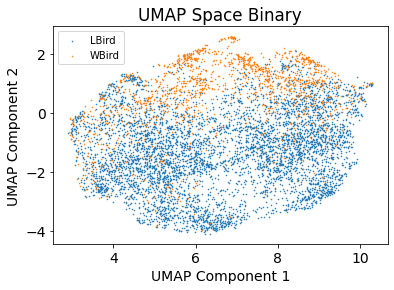

In [217]:
make_plot('UMAP Space Binary', embeds_base, groups_b_base,  labels=['LBird', 'WBird'])

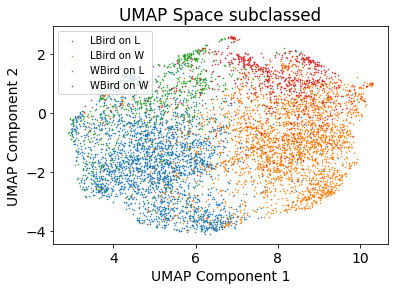

In [218]:
make_plot('UMAP Space subclassed', embeds_base, groups_base)

## Feature with Preds (Standard ERM)

In [223]:
df_features_supp = pd.read_csv('./features_super_preds.csv', index_col=0)
features_supp = df_features_supp.drop(['label', 'pred_labels'], axis=1).values
reducer = UMAP(n_neighbors=30,
    min_dist=0.0,random_state=8, n_components=2)#TSNE(n_components=2, random_state=420)
embeds_supp = reducer.fit_transform(features_supp)

In [224]:
groups_supp =  df_features_supp['label'].values
groups_p_supp = df_features_supp['pred_labels'].values
groups_b_supp = np.where(groups_supp > 1, 1,0)

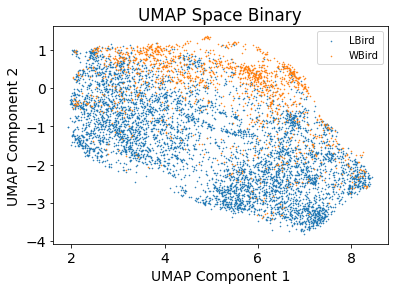

In [225]:
make_plot('UMAP Space Binary', embeds_supp, groups_b_supp,  labels=['LBird', 'WBird'])

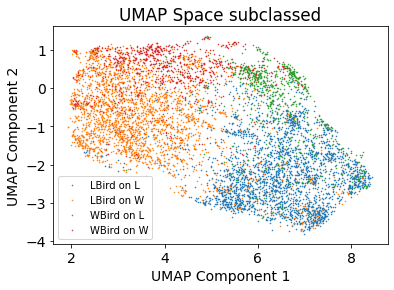

In [226]:
make_plot('UMAP Space subclassed', embeds_supp, groups_supp)

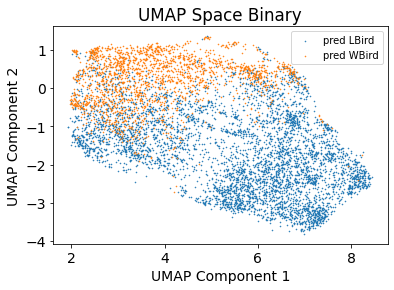

In [227]:
make_plot('UMAP Space Binary', embeds_supp, groups_p_supp,  labels=['pred LBird', 'pred WBird'])

In [228]:
groups_incorrect = np.where(groups_p_supp==groups_b_supp,0,1)

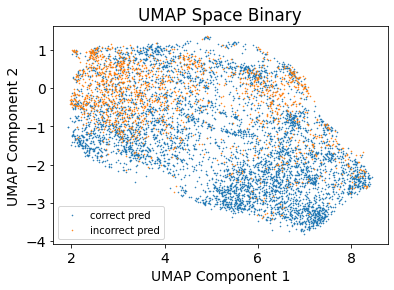

In [229]:
make_plot('UMAP Space Binary', embeds_supp, groups_incorrect,  labels=['correct pred', 'incorrect pred'])

## Features with Preds (GDRO)

In [207]:
df_features_supgp = pd.read_csv('./features_super_g_preds.csv', index_col=0)
features_supgp = df_features_supgp.drop(['label', 'pred_labels'], axis=1).values
reducer = UMAP(random_state=8, n_components=2)#TSNE(n_components=2, random_state=420)
embeds_supgp = reducer.fit_transform(features_supgp)

In [208]:
groups_supgp =  df_features_supgp['label'].values
groups_p_supgp = df_features_supgp['pred_labels'].values
groups_b_supgp = np.where(groups_supgp > 1, 1,0)

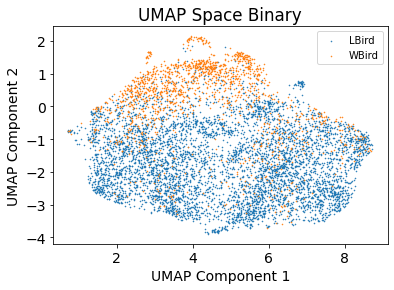

In [209]:
make_plot('UMAP Space Binary', embeds_supgp, groups_b_supgp,  labels=['LBird', 'WBird'])

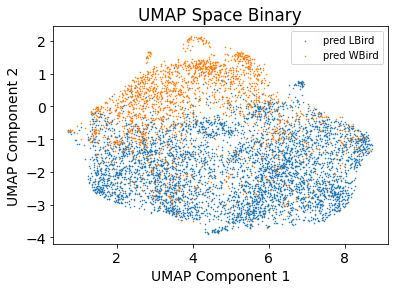

In [210]:
make_plot('UMAP Space Binary', embeds_supgp, groups_p_supgp,  labels=['pred LBird', 'pred WBird'])

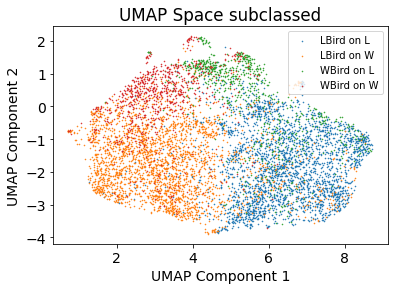

In [214]:
make_plot('UMAP Space subclassed', embeds_supgp, groups_supgp)

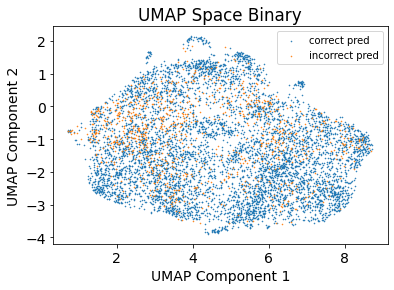

In [213]:
groups_incorrect = np.where(groups_p_supgp==groups_b_supgp,0,1)
make_plot('UMAP Space Binary', embeds_supgp, groups_incorrect,  labels=['correct pred', 'incorrect pred'])

## Civil Comments!!!

In [238]:
df_features = pd.read_csv('./cc_sup_erm.csv', index_col=0)
features = df_features.drop(['label', 'pred_labels'], axis=1).values
reducer = UMAP(random_state=8, n_components=2)#TSNE(n_components=2, random_state=420)
embeds = reducer.fit_transform(features)

In [240]:
groups =  df_features['label'].values
groups_p = df_features['pred_labels'].values
groups_b = np.where(groups > 1, 1,0)

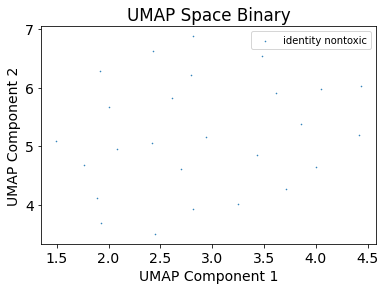

In [241]:
make_plot('UMAP Space Binary', embeds, groups,  labels=['identity nontoxic', 'nonidentiy nontoxic', 'identity toxic', 'nonidentiy toxic'])

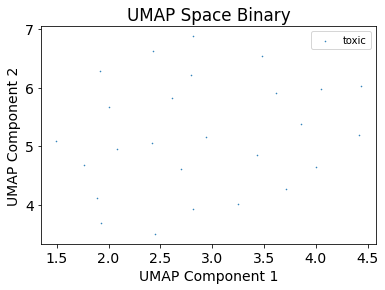

In [242]:
make_plot('UMAP Space Binary', embeds, groups_b,  labels=['toxic', 'nontoxic'])